In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### 30 minutes agg.

In [2]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='gesamtmessung_30T', 
    freq=30,
    normalize_time=True
    )

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.10) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.20, 0.23) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
    )


covar_module = locally_short_periodic + locally_long_periodic + local_variation #+ local_variation_2

### Create, Train, and Perform Inference

Iter 1 , Loss = 1.025874317628516 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9877774854733379 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9511524381341689 , Noise = 0.5982140898704529
Iter 4 , Loss = 0.9155065931982658 , Noise = 0.5543724894523621
Iter 5 , Loss = 0.8804251001450933 , Noise = 0.5129377841949463
Iter 6 , Loss = 0.8456298649033234 , Noise = 0.4738697409629822
Iter 7 , Loss = 0.8114146680362501 , Noise = 0.4371214509010315
Iter 8 , Loss = 0.7788794621905971 , Noise = 0.40263909101486206
Iter 9 , Loss = 0.7480193274955141 , Noise = 0.3703683018684387
Iter 10 , Loss = 0.7179749003275134 , Noise = 0.340253621339798
Iter 11 , Loss = 0.6885260205659521 , Noise = 0.3122313916683197
Iter 12 , Loss = 0.6593897109966834 , Noise = 0.28622961044311523
Iter 13 , Loss = 0.6309939143990168 , Noise = 0.2621679902076721
Iter 14 , Loss = 0.6039401885094573 , Noise = 0.23996157944202423
Iter 15 , Loss = 0.5774779049478594 , Noise = 0.21952375769615173
Iter 16 , Loss = 0.5504197135233

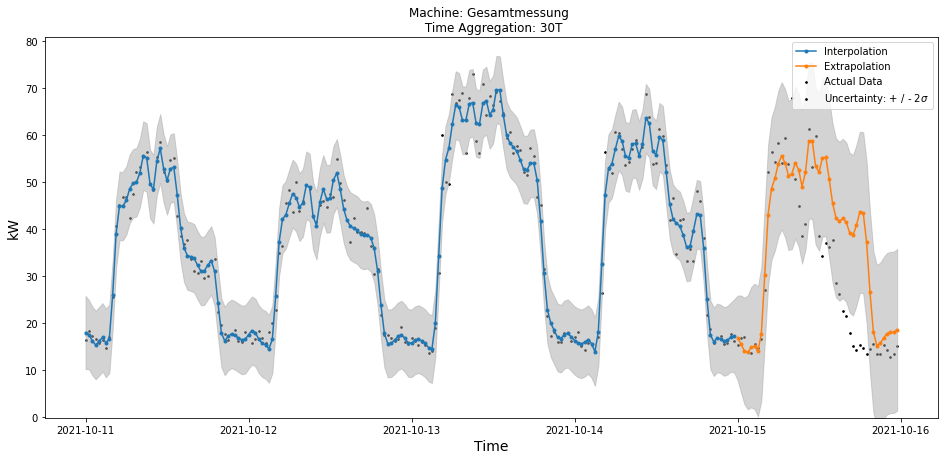

Abnormal High Energy Consumption
---------------------------------
2021-10-13T04:30:00.000000000 60.02493361340412
2021-10-14T04:30:00.000000000 56.487998194965606


Abnormal Low Energy Consumption
---------------------------------
2021-10-13T05:30:00.000000000 49.58454603662293


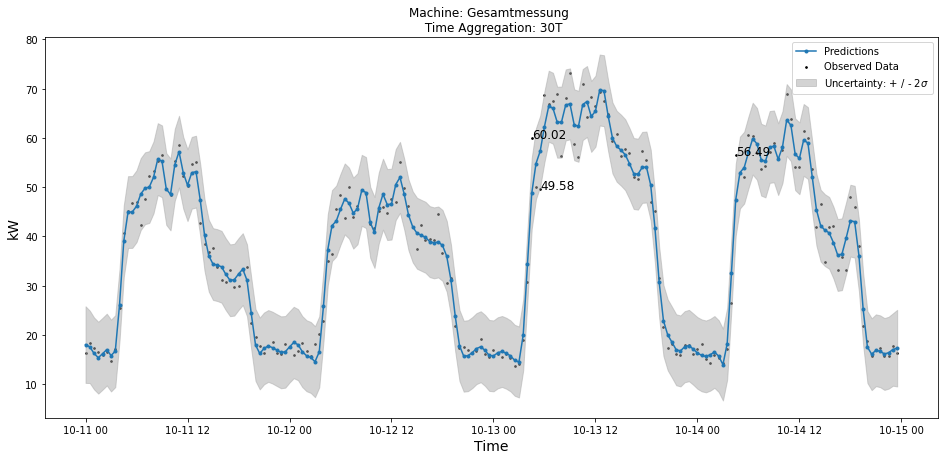

/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:412: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[upper], deviation[upper], color='red')
/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:413: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[lower], deviation[lower], color='red')


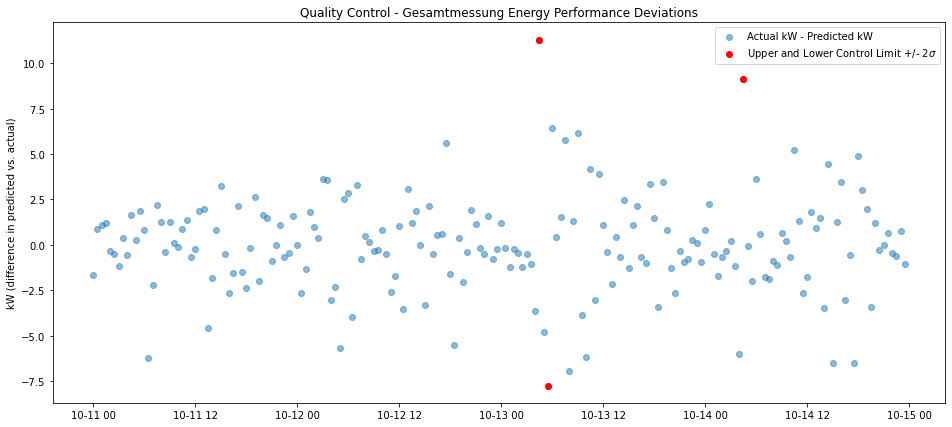

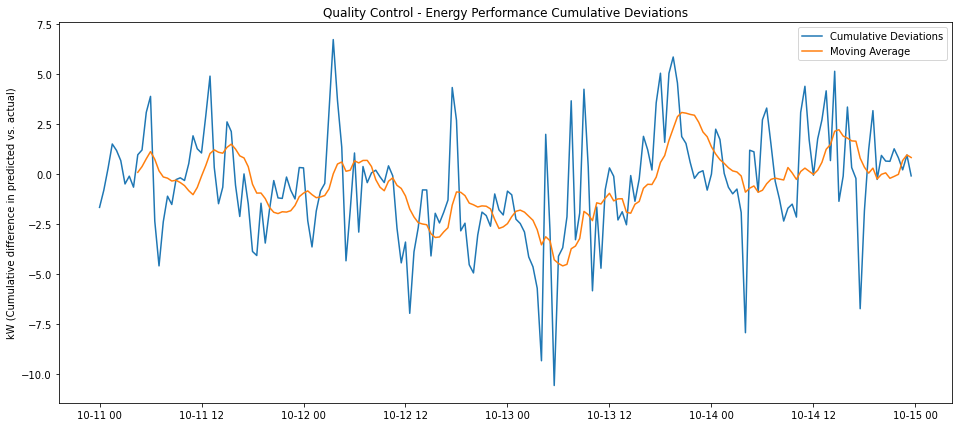

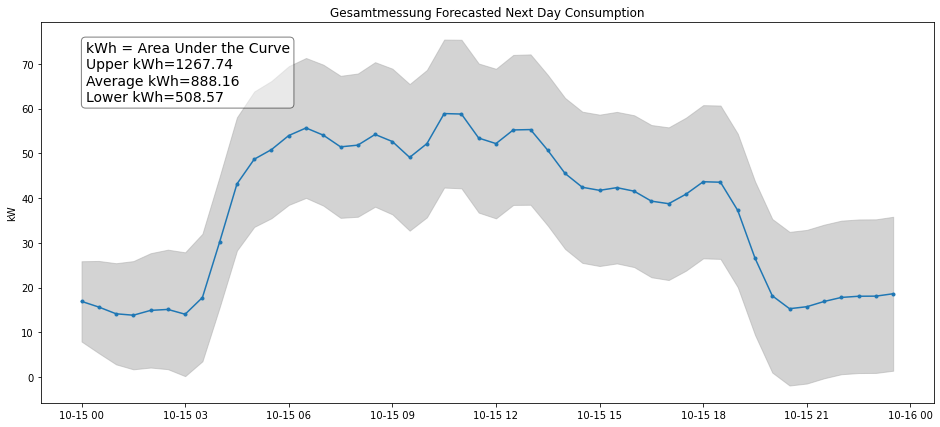

In [4]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    training_iter=75,
    lr=0.1,
    machine='Gesamtmessung',
    update_score=False
)

In [6]:
mse, mape

(155.44986251661598, 0.42202780073667423)

### 10 minutes agg.

In [7]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='gesamtmessung_10T', 
    freq=10,
    normalize_time=True
    )

In [8]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.10) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.19, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.9195603535924936 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8852495454767831 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8511982114698594 , Noise = 0.5982182621955872
Iter 4 , Loss = 0.8168954774559934 , Noise = 0.5543885827064514
Iter 5 , Loss = 0.7829059502999924 , Noise = 0.512975811958313
Iter 6 , Loss = 0.7495759032025986 , Noise = 0.47394123673439026
Iter 7 , Loss = 0.7165462124940888 , Noise = 0.4372396171092987
Iter 8 , Loss = 0.6836808496825687 , Noise = 0.402817040681839
Iter 9 , Loss = 0.6514671752671396 , Noise = 0.37061306834220886
Iter 10 , Loss = 0.6204466916040814 , Noise = 0.340565025806427
Iter 11 , Loss = 0.5906962669337652 , Noise = 0.31260859966278076
Iter 12 , Loss = 0.5620534433910684 , Noise = 0.2866746783256531
Iter 13 , Loss = 0.5344317940158037 , Noise = 0.26268714666366577
Iter 14 , Loss = 0.5077333903502073 , Noise = 0.2405632883310318
Iter 15 , Loss = 0.48176712758346935 , Noise = 0.2202148586511612
Iter 16 , Loss = 0.4564892899526

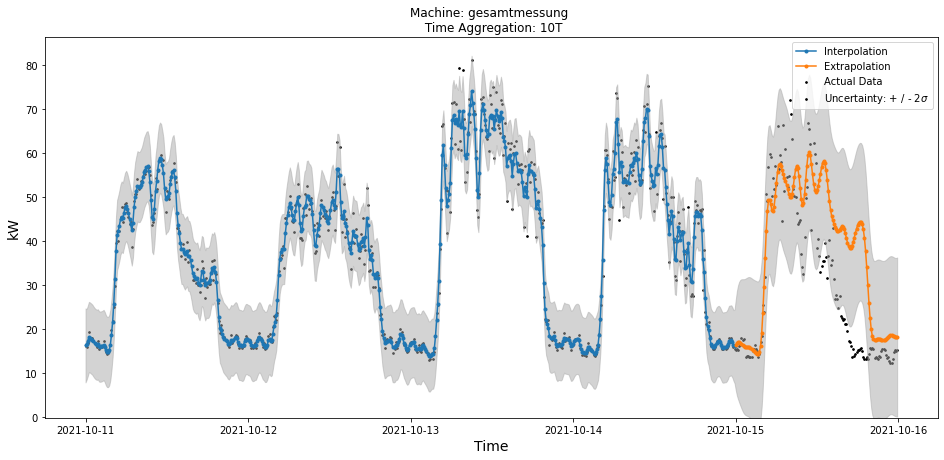

Abnormal High Energy Consumption
---------------------------------
2021-10-13T07:10:00.000000000 79.27781339601682
2021-10-13T07:40:00.000000000 78.7045337361481
2021-10-14T12:10:00.000000000 64.74143323432156
2021-10-14T17:00:00.000000000 47.753673021544245


Abnormal Low Energy Consumption
---------------------------------
2021-10-13T14:10:00.000000000 48.98641793505108
2021-10-13T17:10:00.000000000 41.25809469973069
2021-10-14T06:50:00.000000000 44.87954369805456


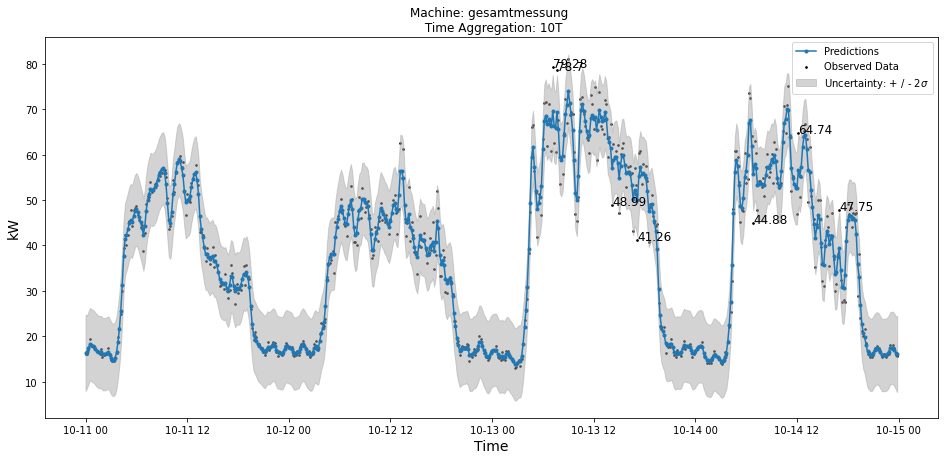

/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:412: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[upper], deviation[upper], color='red')
/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:413: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[lower], deviation[lower], color='red')


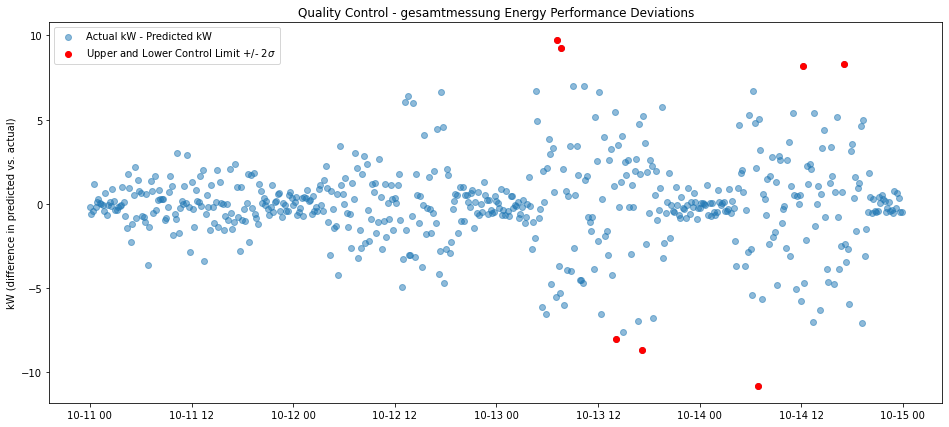

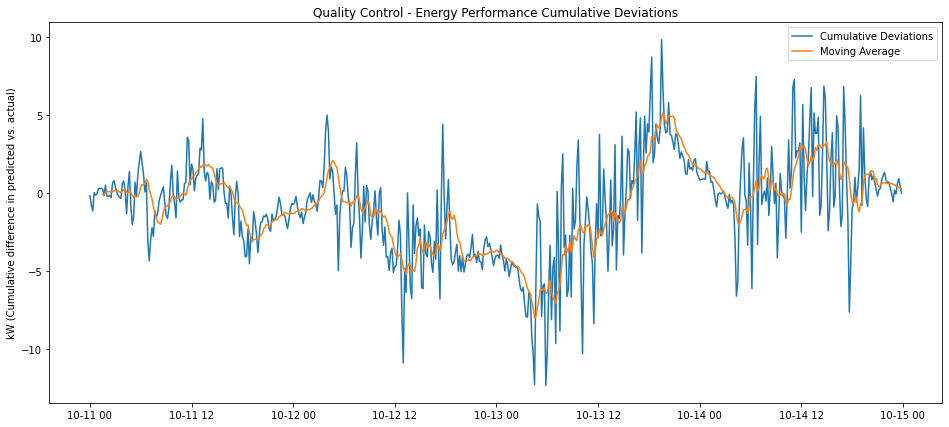

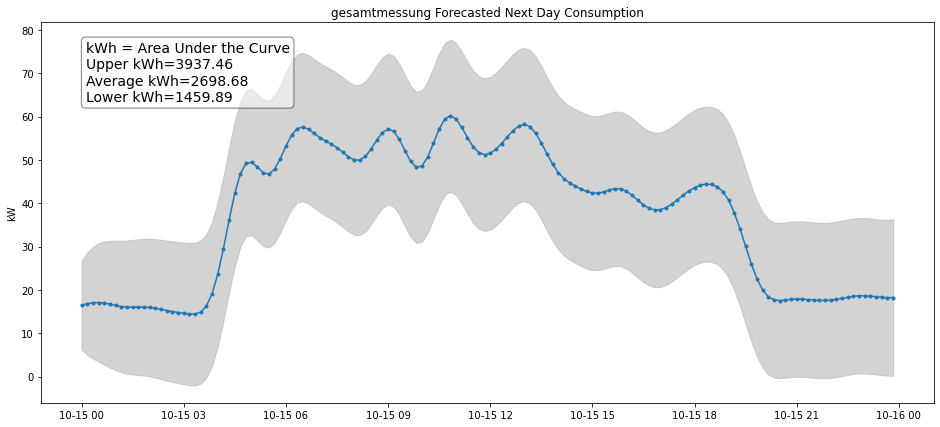

In [9]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=75,
    lr=0.1,
    time_agg='10T',
    machine='gesamtmessung',
    update_score=False
)

In [14]:
mse, mape

(173.65089027708862, 0.4495286471506229)

### 5 minutes

In [11]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='gesamtmessung_5T', 
    freq=5,
    normalize_time=True
    )

In [12]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.10) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.19, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

In [13]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=75,
    lr=0.05,
    time_agg='5T',
    machine='Gesamtmessung',
    update_score=False
)

NameError: name 'train_loader' is not defined